In [1]:
url_bpc = '202306_BPC.zip'
url_fpm = 'FPM-por-Municipio.csv'

In [2]:
import pandas as pd

In [3]:
df_bpc_2023 = pd.read_csv(url_bpc, compression = "zip", sep = ";", encoding = 'ISO-8859-1')

In [4]:
df_bpc_2023 = df_bpc_2023.drop(['NIS BENEFICIÁRIO', 'CPF BENEFICIÁRIO',
       'NOME BENEFICIÁRIO', 'NIS REPRESENTANTE LEGAL',
       'CPF REPRESENTANTE LEGAL', 'NOME REPRESENTANTE LEGAL',], axis=1)

In [5]:
df_bpc_2023['VALOR PARCELA'] = df_bpc_2023['VALOR PARCELA'].str.replace(',', '.').astype(float)
df_bpc_2023['NÚMERO BENEFÍCIO'] = df_bpc_2023['NÚMERO BENEFÍCIO'].astype(str)

In [6]:
df_bpc_2023['ANO COMPETÊNCIA'] = df_bpc_2023['MÊS COMPETÊNCIA'].apply(lambda x: int(str(x)[:4]))
df_bpc_2023['ANO REFERÊNCIA'] = df_bpc_2023['MÊS REFERÊNCIA'].apply(lambda x: int(str(x)[:4]))
df_bpc_2023['MÊS COMPETÊNCIA'] = df_bpc_2023['MÊS COMPETÊNCIA'].apply(lambda x: int(str(x)[4:]))
df_bpc_2023['MÊS REFERÊNCIA'] = df_bpc_2023['MÊS REFERÊNCIA'].apply(lambda x: int(str(x)[4:]))

In [7]:
nova_ordem_colunas = ['MÊS COMPETÊNCIA', 'ANO COMPETÊNCIA', 'MÊS REFERÊNCIA', 'ANO REFERÊNCIA', 'UF', 'CÓDIGO MUNICÍPIO SIAFI',
       'NOME MUNICÍPIO', 'NÚMERO BENEFÍCIO',
       'BENEFÍCIO CONCEDIDO JUDICIALMENTE', 'VALOR PARCELA']
       
df_bpc_2023 = df_bpc_2023[nova_ordem_colunas]

In [8]:
df_bpc_2023.head()

,MÊS COMPETÊNCIA,ANO COMPETÊNCIA,MÊS REFERÊNCIA,ANO REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,NÚMERO BENEFÍCIO,BENEFÍCIO CONCEDIDO JUDICIALMENTE,VALOR PARCELA
0,6,2023,6,2023,AC,643,ACRELANDIA,1951147666,SIM,1320.0
1,6,2023,6,2023,AC,643,ACRELANDIA,7120011260,NÃO,1320.0
2,6,2023,6,2023,AC,643,ACRELANDIA,5376219050,SIM,1320.0
3,6,2023,6,2023,AC,643,ACRELANDIA,7042454236,SIM,1320.0
4,6,2023,6,2023,AC,643,ACRELANDIA,7030637195,NÃO,1320.0


In [9]:
df_bpc_2023.columns

Index(['MÊS COMPETÊNCIA', 'ANO COMPETÊNCIA', 'MÊS REFERÊNCIA',
       'ANO REFERÊNCIA', 'UF', 'CÓDIGO MUNICÍPIO SIAFI', 'NOME MUNICÍPIO',
       'NÚMERO BENEFÍCIO', 'BENEFÍCIO CONCEDIDO JUDICIALMENTE',
       'VALOR PARCELA'],
      dtype='object')

In [10]:
df_bpc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329941 entries, 0 to 5329940
Data columns (total 10 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   MÊS COMPETÊNCIA                    int64  
 1   ANO COMPETÊNCIA                    int64  
 2   MÊS REFERÊNCIA                     int64  
 3   ANO REFERÊNCIA                     int64  
 4   UF                                 object 
 5   CÓDIGO MUNICÍPIO SIAFI             int64  
 6   NOME MUNICÍPIO                     object 
 7   NÚMERO BENEFÍCIO                   object 
 8   BENEFÍCIO CONCEDIDO JUDICIALMENTE  object 
 9   VALOR PARCELA                      float64
dtypes: float64(1), int64(5), object(4)
memory usage: 406.6+ MB


In [11]:
df_mul_siafi_ibge = pd.read_excel('municipios_siafi_ibge.xlsx')

In [12]:
df_mul_siafi_ibge

,siafi_id,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,ddd,fuso_horario,sem_acento
0,1050,5200050,Abadia de Goiás,-167573,-494412,0,52,62,America/Sao_Paulo,ABADIA DE GOIAS
1,4001,3100104,Abadia dos Dourados,-184831,-473916,0,31,34,America/Sao_Paulo,ABADIA DOS DOURADOS
2,9201,5200100,Abadiânia,-16197,-487057,0,52,62,America/Sao_Paulo,ABADIANIA
3,4003,3100203,Abaeté,-191551,-454444,0,31,37,America/Sao_Paulo,ABAETE
4,401,1500107,Abaetetuba,-172183,-488788,0,15,91,America/Sao_Paulo,ABAETETUBA
...,...,...,...,...,...,...,...,...,...,...
5565,3971,2933604,Xique-Xique,-10823,-427245,0,29,74,America/Sao_Paulo,XIQUE-XIQUE
5566,542,2517407,Zabelê,-807901,-371057,0,25,83,America/Sao_Paulo,ZABELE
5567,2973,3557154,Zacarias,-210506,-500552,0,35,18,America/Sao_Paulo,ZACARIAS
5568,1287,2114007,Zé Doca,-327014,-456553,0,21,98,America/Sao_Paulo,ZE DOCA


In [13]:
df_bpc_2023['CÓDIGO MUNICÍPIO IBGE'] = df_bpc_2023['CÓDIGO MUNICÍPIO SIAFI'].map(df_mul_siafi_ibge.set_index('siafi_id')['codigo_ibge'])
df_bpc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329941 entries, 0 to 5329940
Data columns (total 11 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   MÊS COMPETÊNCIA                    int64  
 1   ANO COMPETÊNCIA                    int64  
 2   MÊS REFERÊNCIA                     int64  
 3   ANO REFERÊNCIA                     int64  
 4   UF                                 object 
 5   CÓDIGO MUNICÍPIO SIAFI             int64  
 6   NOME MUNICÍPIO                     object 
 7   NÚMERO BENEFÍCIO                   object 
 8   BENEFÍCIO CONCEDIDO JUDICIALMENTE  object 
 9   VALOR PARCELA                      float64
 10  CÓDIGO MUNICÍPIO IBGE              int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 447.3+ MB


In [14]:
df_bpc_2023 =  df_bpc_2023.groupby('CÓDIGO MUNICÍPIO IBGE').agg(
    ano_competência = ('ANO COMPETÊNCIA', 'first'),
    ano_referencia = ('ANO REFERÊNCIA','first'),
    uf = ('UF', 'first'),
    nome_municipio = ( 'NOME MUNICÍPIO','first'),
    n_beneficio = ('NÚMERO BENEFÍCIO','nunique'),
    valor_parcela_bpc = ('VALOR PARCELA', 'sum')
)

In [15]:
df_bpc_2023

,ano_competência,ano_referencia,uf,nome_municipio,n_beneficio,valor_parcela_bpc
CÓDIGO MUNICÍPIO IBGE,,,,,,
1100015,2023,2023,RO,ALTA FLORESTA D'OESTE,548,723368.84
1100023,2023,2023,RO,ARIQUEMES,3118,4115833.40
1100031,2023,2023,RO,CABIXI,82,108241.96
1100049,2023,2023,RO,CACOAL,2257,2979284.23
1100056,2023,2023,RO,CEREJEIRAS,458,604566.19
...,...,...,...,...,...,...
5222005,2023,2023,GO,VIANOPOLIS,344,454082.99
5222054,2023,2023,GO,VICENTINOPOLIS,142,187444.16
5222203,2023,2023,GO,VILA BOA,138,182160.20


In [16]:
df_bpc_2023.sort_values(by='valor_parcela_bpc', ascending=False).head(5)

,ano_competência,ano_referencia,uf,nome_municipio,n_beneficio,valor_parcela_bpc
CÓDIGO MUNICÍPIO IBGE,,,,,,
3550308,2023,2023,SP,SAO PAULO,242142,3.196337e+08
3304557,2023,2023,RJ,RIO DE JANEIRO,142400,1.879733e+08
2304400,2023,2023,CE,FORTALEZA,108803,1.436245e+08
2927408,2023,2023,BA,SALVADOR,84611,1.116901e+08
2611606,2023,2023,PE,RECIFE,83968,1.108404e+08


In [17]:
df_bpc_2023.sort_values(by='valor_parcela_bpc', ascending=True).head(5)

,ano_competência,ano_referencia,uf,nome_municipio,n_beneficio,valor_parcela_bpc
CÓDIGO MUNICÍPIO IBGE,,,,,,
4305934,2023,2023,RS,CORONEL PILAR,1,1320.0
4305587,2023,2023,RS,COLINAS,1,1320.0
4322855,2023,2023,RS,VESPASIANO CORREA,1,1320.0
4322350,2023,2023,RS,UNIAO DA SERRA,2,2640.0
2201988,2023,2023,PI,BREJO DO PIAUI,2,2640.0


In [18]:
df_fpm_2023 = pd.read_csv(url_fpm, sep = ";", encoding = 'ISO-8859-1')

In [19]:
df_fpm_2023 = df_fpm_2023.drop(['Município - UF', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'], axis=1)

In [20]:
df_fpm_2023 = df_fpm_2023.dropna()

In [21]:
df_fpm_2023['2023'] = df_fpm_2023['2023'].str.replace('-','0')

In [22]:
df_fpm_2023['2023'] = df_fpm_2023['2023'].str.replace('.','',2)

In [23]:
df_fpm_2023['2023'] = df_fpm_2023['2023'].str.replace(',', '.').astype(float)

In [24]:
df_fpm_2023['COD_MUN_IBGE'] = df_fpm_2023['COD_MUN'].map(df_mul_siafi_ibge.set_index('siafi_id')['codigo_ibge'])

In [25]:
df_fpm_2023 =  df_fpm_2023.groupby('COD_MUN_IBGE').agg(
    uf = ('UF', 'first'),
    nome_municipio = ( 'Município','first'),
    repasse_fpm = ('2023', 'sum')
)

df_fpm_2023

,uf,nome_municipio,repasse_fpm
COD_MUN_IBGE,,,
1100015,RO,Alta Floresta D'Oeste,1.569381e+07
1100023,RO,Ariquemes,3.587157e+07
1100031,RO,Cabixi,6.725920e+06
1100049,RO,Cacoal,3.138763e+07
1100056,RO,Cerejeiras,1.345184e+07
...,...,...,...
5222005,GO,Vianópolis,1.402228e+07
5222054,GO,Vicentinópolis,8.413368e+06
5222203,GO,Vila Boa,8.413368e+06


In [26]:
df_fpm_2023.sort_values(by='repasse_fpm', ascending=True).head(10)

,uf,nome_municipio,repasse_fpm
COD_MUN_IBGE,,,
1400605,RR,São Luiz,3521676.80
1400506,RR,São João da Baliza,3521676.80
1600105,AP,Amapá,4594427.85
1600550,AP,Pracuúba,4594427.85
1600253,AP,Itaubal,4594427.85
1600238,AP,Ferreira Gomes,4594427.85
1600212,AP,Cutias,4594427.85
1600055,AP,Serra do Navio,4594427.85
1400233,RR,Caroebe,4695568.95


In [27]:
df_fpm_2023.sort_values(by='repasse_fpm', ascending=False).head(10)

,uf,nome_municipio,repasse_fpm
COD_MUN_IBGE,,,
2304400,CE,Fortaleza,9.545419e+08
2927408,BA,Salvador,8.590877e+08
1302603,AM,Manaus,6.013614e+08
2111300,MA,São Luís,5.965887e+08
3106200,MG,Belo Horizonte,5.727251e+08
2611606,PE,Recife,5.573012e+08
2211001,PI,Teresina,5.526643e+08
2704302,AL,Maceió,4.772709e+08
1400100,RR,Boa Vista,4.772709e+08


In [28]:
df_bpc_fpm = df_bpc_2023.merge(df_fpm_2023, left_on='CÓDIGO MUNICÍPIO IBGE', right_index=True, how='left')
df_bpc_fpm = df_bpc_fpm.drop(['uf_y','nome_municipio_y'], axis=1)
df_bpc_fpm = df_bpc_fpm.rename(columns={'uf_x': 'uf', 'nome_municipio_x': 'nome_municipio'})

In [29]:
df_bpc_fpm

,ano_competência,ano_referencia,uf,nome_municipio,n_beneficio,valor_parcela_bpc,repasse_fpm
CÓDIGO MUNICÍPIO IBGE,,,,,,,
1100015,2023,2023,RO,ALTA FLORESTA D'OESTE,548,723368.84,1.569381e+07
1100023,2023,2023,RO,ARIQUEMES,3118,4115833.40,3.587157e+07
1100031,2023,2023,RO,CABIXI,82,108241.96,6.725920e+06
1100049,2023,2023,RO,CACOAL,2257,2979284.23,3.138763e+07
1100056,2023,2023,RO,CEREJEIRAS,458,604566.19,1.345184e+07
...,...,...,...,...,...,...,...
5222005,2023,2023,GO,VIANOPOLIS,344,454082.99,1.402228e+07
5222054,2023,2023,GO,VICENTINOPOLIS,142,187444.16,8.413368e+06
5222203,2023,2023,GO,VILA BOA,138,182160.20,8.413368e+06


In [30]:
df_bpc_fpm['fpm_bpc'] =df_bpc_fpm['valor_parcela_bpc']/df_bpc_fpm['repasse_fpm']

In [31]:
df_bpc_fpm.describe()

,ano_competência,ano_referencia,n_beneficio,valor_parcela_bpc,repasse_fpm,fpm_bpc
count,5570.0,5570.0,5570.000000,5.570000e+03,5.569000e+03,5569.000000
mean,2023.0,2023.0,956.901436,1.263140e+06,1.966430e+07,0.033431
std,0.0,0.0,5135.221063,6.778667e+06,3.368654e+07,0.038658
min,2023.0,2023.0,1.000000,1.320000e+03,3.521677e+06,0.000154
25%,2023.0,2023.0,75.000000,9.900000e+04,9.284419e+06,0.010584
50%,2023.0,2023.0,212.000000,2.798420e+05,1.239889e+07,0.022594
75%,2023.0,2023.0,647.750000,8.550306e+05,1.999859e+07,0.043170
max,2023.0,2023.0,242142.000000,3.196337e+08,9.545419e+08,0.956730


In [32]:
df_bpc_fpm = df_bpc_fpm.merge(df_mul_siafi_ibge[['codigo_ibge', 'latitude', 'longitude']], left_index=True, right_on='codigo_ibge', how='left')

In [33]:
df_bpc_fpm.reset_index(drop=True, inplace=True)

In [34]:
df_bpc_fpm.sort_values(by='fpm_bpc', ascending=True)

,ano_competência,ano_referencia,uf,nome_municipio,n_beneficio,valor_parcela_bpc,repasse_fpm,fpm_bpc,codigo_ibge,latitude,longitude
5088,2023,2023,RS,VESPASIANO CORREA,1,1.320000e+03,8.570826e+06,0.000154,4322855,-290655,-518625
4724,2023,2023,RS,CORONEL PILAR,1,1.320000e+03,8.570826e+06,0.000154,4305934,-292695,-516847
4716,2023,2023,RS,COLINAS,1,1.320000e+03,8.570826e+06,0.000154,4305587,-293948,-518556
5077,2023,2023,RS,UNIAO DA SERRA,2,2.640000e+03,8.570826e+06,0.000308,4322350,-287833,-520238
702,2023,2023,PI,BREJO DO PIAUI,2,2.640000e+03,7.761084e+06,0.000340,2201988,-820314,-428229
...,...,...,...,...,...,...,...,...,...,...,...
3224,2023,2023,RJ,NOVA IGUACU,23483,3.099850e+07,6.821671e+07,0.454412,3303500,-227556,-434603
3242,2023,2023,RJ,RIO DE JANEIRO,142400,1.879733e+08,3.818168e+08,0.492313,3304557,-229129,-432003
3199,2023,2023,RJ,DUQUE DE CAXIAS,30006,3.960897e+07,6.821671e+07,0.580634,3301702,-227858,-433049
3829,2023,2023,SP,SAO PAULO,242142,3.196337e+08,3.340897e+08,0.956730,3550308,-235329,-466395


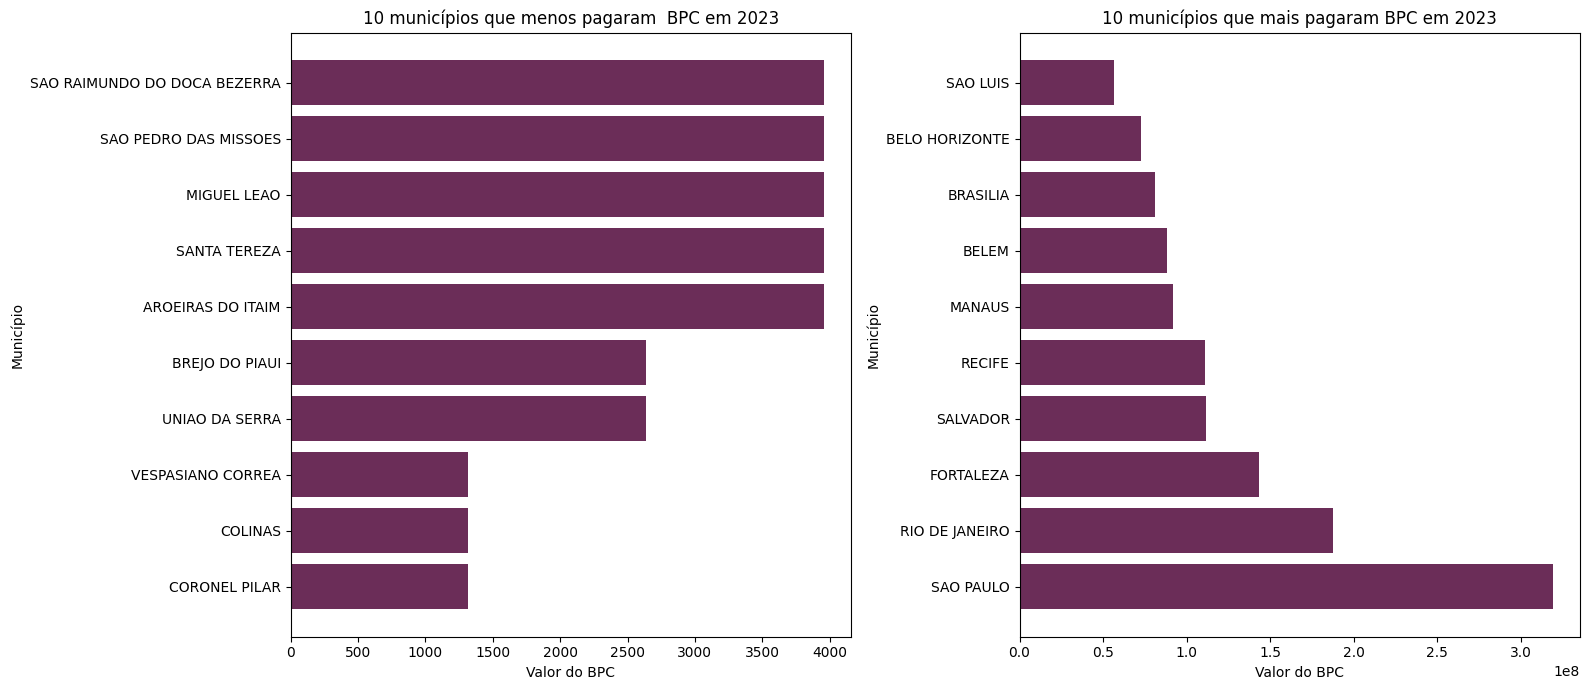

In [37]:
import matplotlib.pyplot as plt

# Ordene os valores de 'valor_parcela_bpc' em ordem crescente para os 10 menores municípios
top_10_municipios_menos = df_bpc_2023.sort_values(by='valor_parcela_bpc', ascending=True).head(10)

# Ordene os valores de 'valor_parcela_bpc' em ordem decrescente para os 10 maiores municípios
top_10_municipios_mais = df_bpc_2023.sort_values(by='valor_parcela_bpc', ascending=False).head(10)

# Crie uma figura com duas colunas para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico para os 10 municípios que menos receberam BPC
axs[0].barh(top_10_municipios_menos['nome_municipio'], top_10_municipios_menos['valor_parcela_bpc'], color='#6B2D58')
axs[0].set_xlabel('Valor do BPC')
axs[0].set_ylabel('Município')
axs[0].set_title('10 municípios que menos pagaram  BPC em 2023')
axs[0].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


# Gráfico para os 10 municípios que mais receberam BPC
axs[1].barh(top_10_municipios_mais['nome_municipio'], top_10_municipios_mais['valor_parcela_bpc'], color='#6B2D58')
axs[1].set_xlabel('Valor do BPC')
axs[1].set_ylabel('Município')
axs[1].set_title('10 municípios que mais pagaram BPC em 2023')
axs[1].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()

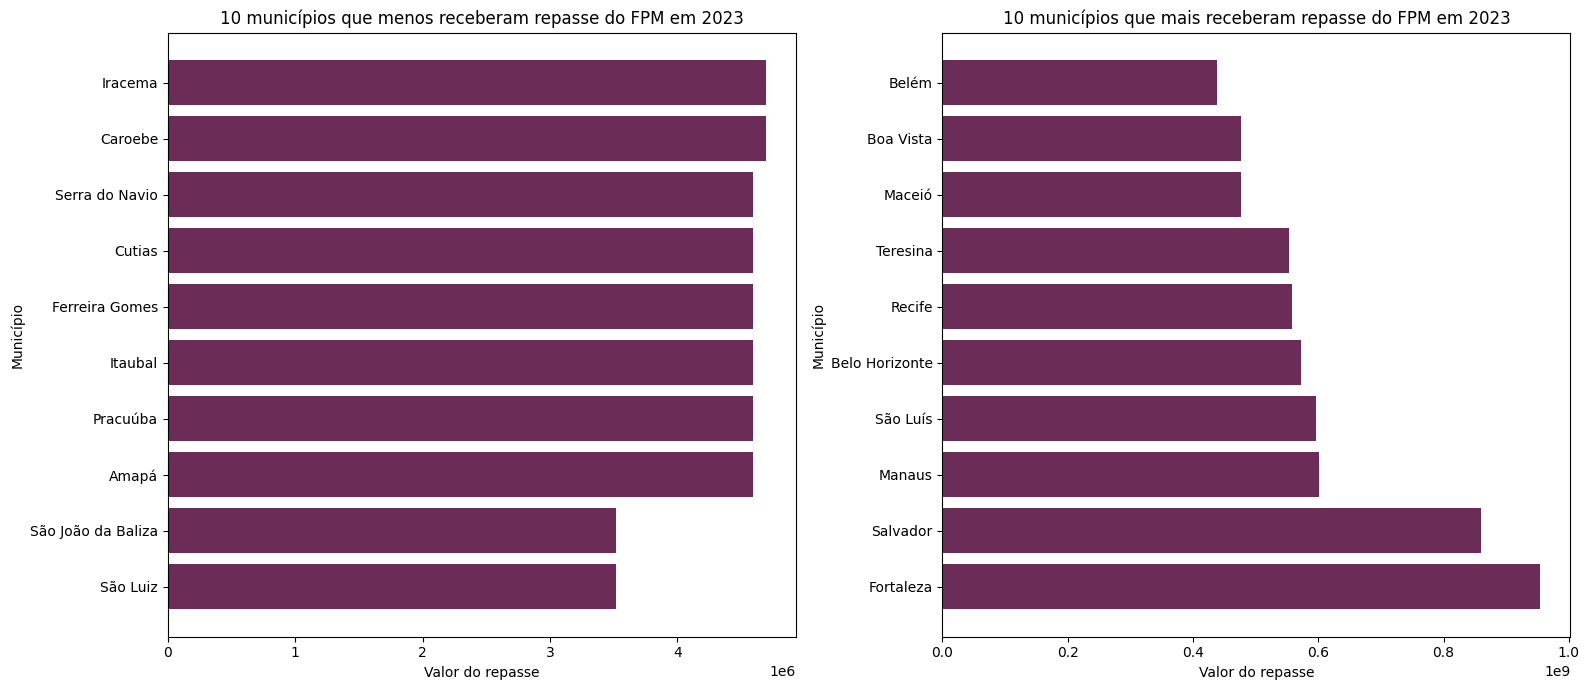

In [38]:

# Ordene os valores de 'valor_parcela_bpc' em ordem crescente para os 10 menores municípios
top_10_municipios_menos = df_fpm_2023.sort_values(by='repasse_fpm', ascending=True).head(10)

# Ordene os valores de 'valor_parcela_bpc' em ordem decrescente para os 10 maiores municípios
top_10_municipios_mais = df_fpm_2023.sort_values(by='repasse_fpm', ascending=False).head(10)

# Crie uma figura com duas colunas para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico para os 10 municípios que menos receberam BPC
axs[0].barh(top_10_municipios_menos['nome_municipio'], top_10_municipios_menos['repasse_fpm'], color='#6B2D58')
axs[0].set_xlabel('Valor do repasse')
axs[0].set_ylabel('Município')
axs[0].set_title('10 municípios que menos receberam repasse do FPM em 2023')
axs[0].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


# Gráfico para os 10 municípios que mais receberam BPC
axs[1].barh(top_10_municipios_mais['nome_municipio'], top_10_municipios_mais['repasse_fpm'], color='#6B2D58')
axs[1].set_xlabel('Valor do repasse')
axs[1].set_ylabel('Município')
axs[1].set_title('10 municípios que mais receberam repasse do FPM em 2023')
axs[1].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()

In [39]:
df_bpc_fpm.columns

Index(['ano_competência', 'ano_referencia', 'uf', 'nome_municipio',
       'n_beneficio', 'valor_parcela_bpc', 'repasse_fpm', 'fpm_bpc',
       'codigo_ibge', 'latitude', 'longitude'],
      dtype='object')